# Capturing Photos with PiCamera and PIL

The first step is to include all the libraries required.

In [18]:
import picamera
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

We're going to use numpy arrays for storing the capture. Other store objects can be used too, but we'll focus on this one.

In [19]:
output = np.empty((480, 640, 3), dtype = np.uint8)

Here we take a capture with the Pi camera at a resolution of 640x480 pixels.

In [20]:
with picamera.PiCamera() as camera:
    camera.resolution = (640, 480)
    # for black and white uncomment the following
    #camera.color_effects = (128,128)
    camera.capture(output, format = 'rgb', use_video_port = True)

And then we save it into the local directory as _photo.jpg_

In [21]:
img = Image.fromarray(output)
img.save("../photo.jpg")

Showing the photo using the `imshow` function of matplotlib or otherwise we can just call `img` by itself, which is a PIL image and then have it shown up here.

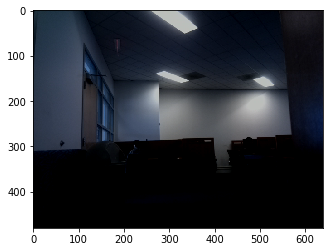

In [22]:
# show image
plt.imshow(output)
# or just use the following command
# img

Here we re-read the image from the disk into `img` variable. We've set `img` to `None` just to illustrate that it works (by overwriting the old image).

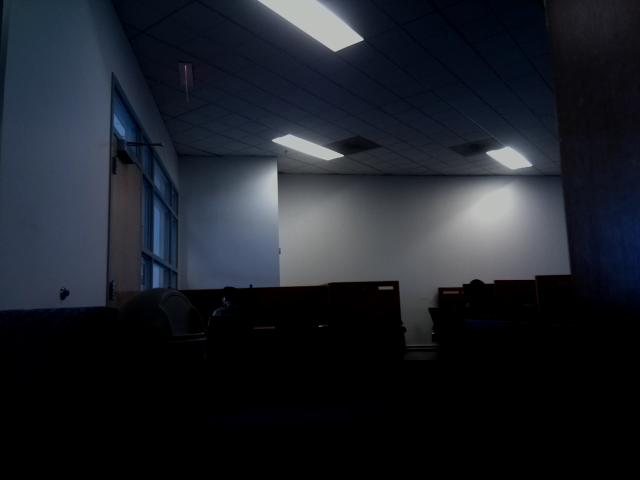

In [23]:
img = None
img = Image.open("../photo.jpg")
img

And then we plot its histogram! Easy peasy!

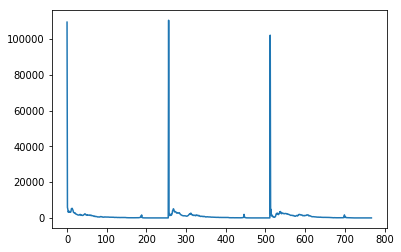

In [24]:
# for images that have more than 1 channel, the channels are concatenated
# so that 24-bit RGBs have values going up to 768
histogram = img.histogram()
plt.plot(histogram)